In [2]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from numpy import *

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean

import keyword

#open api 불러올 때 필요한 것
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import FinanceDataReader as fdr
import plotly.graph_objects as go
import plotly.subplots as ms
import math

import plotly.graph_objects as go
import plotly.subplots as ms

import random

In [4]:
mid1=pd.read_csv('c:/temp/mid1_202404.csv')
mid2=pd.read_csv('c:/temp/mid2_202404.csv')
mid3=pd.read_csv('c:/temp/mid3_202404.csv')
mid4=pd.read_csv('c:/temp/mid4_202404.csv')

In [5]:
mid1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


In [6]:
mid1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
mid1[['Income','Education']].corr()

,Income,Education
Income,1.000000,-0.056855
Education,-0.056855,1.000000


In [9]:
pd.corr(mid1[['Income','Education']])

AttributeError: module 'pandas' has no attribute 'corr'

In [11]:
mid1.corr(mid1[['Income','Education']])

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [12]:
mid2

,Unnamed: 0,Period,Cost,Revenue
0,0,1,100,0
1,1,2,10,0
2,2,3,0,50
3,3,4,0,100
4,4,5,0,200


In [13]:
npf.irr(mid2)

ValueError: Input must be a rank-1 array.

In [14]:
mid22=mid2.drop('Unnamed: 0',axis=1)
mid22

,Period,Cost,Revenue
0,1,100,0
1,2,10,0
2,3,0,50
3,4,0,100
4,5,0,200


In [15]:
npf.irr(mid22)

ValueError: Input must be a rank-1 array.

In [16]:
mid22.set_index('Period', inplace=True)
mid22.head()

,Cost,Revenue
Period,,
1,100,0
2,10,0
3,0,50
4,0,100
5,0,200


In [19]:
cashflow=pd.Series(index=[0,1,2,3,4], name='Cashflow', data=[-100,10,50,100,200])
print(cashflow)

0   -100
1     10
2     50
3    100
4    200
Name: Cashflow, dtype: int64


In [20]:
npf.irr(cashflow)

0.49019853599514174

In [21]:
mid3

,Unnamed: 0,monoth,deposit,m_rent,built_yr,dong_name,apt_name,size,gu_code
0,0,202312,"1,000",80,2018,신설동,포레스트힐시티,14.750,11230
1,1,202312,"1,000",77,2017,신설동,신설동지웰홈스,19.700,11230
2,2,202312,"1,000",70,2017,신설동,신설동지웰홈스,13.750,11230
3,3,202312,"16,200",10,2018,신설동,포레스트힐시티,15.250,11230
4,4,202312,"3,000",56,2018,신설동,포레스트힐시티,15.210,11230
...,...,...,...,...,...,...,...,...,...
670,670,202312,"37,000",0,2002,이문동,중앙하이츠빌,59.400,11230
671,671,202312,"5,000",100,2000,이문동,쌍용,59.990,11230
672,672,202312,"37,000",0,2002,이문동,중앙하이츠빌,59.400,11230
673,673,202312,"54,000",0,2001,이문동,이문삼성래미안아파트,149.934,11230


In [22]:
mid3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  675 non-null    int64  
 1   monoth      675 non-null    int64  
 2   deposit     675 non-null    object 
 3   m_rent      675 non-null    int64  
 4   built_yr    675 non-null    int64  
 5   dong_name   675 non-null    object 
 6   apt_name    675 non-null    object 
 7   size        675 non-null    float64
 8   gu_code     675 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 47.6+ KB


In [25]:
deposit1=mid3[i].deposit.string.strip()

NameError: name 'i' is not defined

In [24]:
mid3['deposit'].quantile(0.25)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [23]:
IQR=mid3['deposit'].quantile(0.75)-mid3['deposit'].quantile(0.25)
print(IQR)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [26]:
2274/4694

0.48444823178525775

In [28]:
# 파이썬으로 정규분포 곡선 아래 면적(확률)을 계산하고자 한다. 
mean=10
se=20
from scipy.stats import norm 
# Pr(49.5<X100<50.5)
prob=norm.cdf(30,mean, se)-norm.cdf(-30, mean, se)
print(prob)

0.8185946141203637


In [29]:
(1-0.8185946141203637)/2

0.09070269293981814

In [30]:
comb1=math.comb(100,5)
comb1

75287520

In [31]:
comb1*((3/100)**5)*((97/100)**95)

0.10130806502298408

In [32]:
mid4

,Date,Open,High,Low,Close,Volume,Change
0,2023-12-01,137000,138900,129000,136400,2075076,-0.004380
1,2023-12-04,145200,154000,136400,137500,2831258,0.008065
2,2023-12-05,137500,140200,127500,131800,1776760,-0.041455
3,2023-12-06,129500,132000,119700,121700,2385104,-0.076631
4,2023-12-07,122500,129900,111100,127000,3509075,0.043550
...,...,...,...,...,...,...,...
89,2024-04-15,111000,115500,110500,113400,224633,-0.011334
90,2024-04-16,110900,111900,107900,108200,244155,-0.045855
91,2024-04-17,108300,110200,103800,104200,244939,-0.036969
92,2024-04-18,105000,112100,104600,111000,310610,0.065259


In [34]:
mid4['MA3']=mid4['Close'].rolling(window=3).mean()
mid4['MA10']=mid4['Close'].rolling(window=10).mean()
mid4['MA30']=mid4['Close'].rolling(window=30).mean()
mid4.head()

,Date,Open,High,Low,Close,Volume,Change,MA3,MA10,MA30
0,2023-12-01,137000,138900,129000,136400,2075076,-0.004380,NaN,NaN,NaN
1,2023-12-04,145200,154000,136400,137500,2831258,0.008065,NaN,NaN,NaN
2,2023-12-05,137500,140200,127500,131800,1776760,-0.041455,135233.333333,NaN,NaN
3,2023-12-06,129500,132000,119700,121700,2385104,-0.076631,130333.333333,NaN,NaN
4,2023-12-07,122500,129900,111100,127000,3509075,0.043550,126833.333333,NaN,NaN


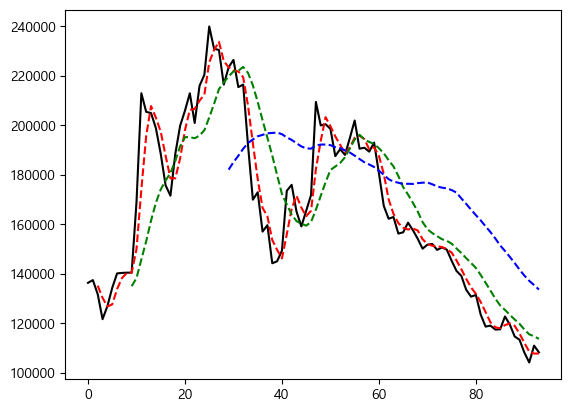

In [36]:
plt.plot(mid4['Close'],color='black')
plt.plot(mid4['MA3'],color='red',linestyle='--')
plt.plot(mid4['MA10'],color='green',linestyle='--')
plt.plot(mid4['MA30'],color='blue',linestyle='--')
plt.show()


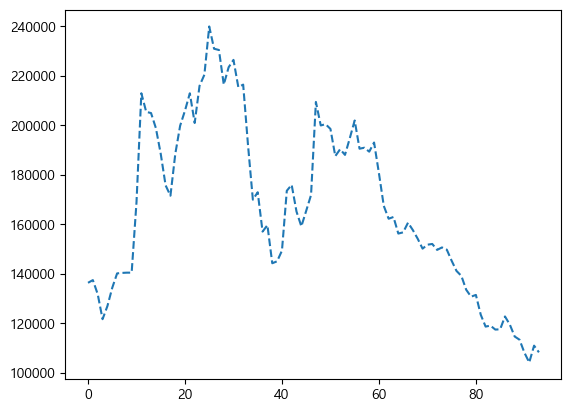

In [37]:
plt.plot(mid4['Close'],linestyle='--')

In [38]:
mid3

,Unnamed: 0,monoth,deposit,m_rent,built_yr,dong_name,apt_name,size,gu_code
0,0,202312,"1,000",80,2018,신설동,포레스트힐시티,14.750,11230
1,1,202312,"1,000",77,2017,신설동,신설동지웰홈스,19.700,11230
2,2,202312,"1,000",70,2017,신설동,신설동지웰홈스,13.750,11230
3,3,202312,"16,200",10,2018,신설동,포레스트힐시티,15.250,11230
4,4,202312,"3,000",56,2018,신설동,포레스트힐시티,15.210,11230
...,...,...,...,...,...,...,...,...,...
670,670,202312,"37,000",0,2002,이문동,중앙하이츠빌,59.400,11230
671,671,202312,"5,000",100,2000,이문동,쌍용,59.990,11230
672,672,202312,"37,000",0,2002,이문동,중앙하이츠빌,59.400,11230
673,673,202312,"54,000",0,2001,이문동,이문삼성래미안아파트,149.934,11230


In [39]:
mid3['deposit']=mid3['deposit'].str.replace(",","").astype(int)

In [40]:
IQR=mid3['deposit'].quantile(0.75)-mid3['deposit'].quantile(0.25)
print(IQR)

40812.5


In [41]:
mid3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  675 non-null    int64  
 1   monoth      675 non-null    int64  
 2   deposit     675 non-null    int32  
 3   m_rent      675 non-null    int64  
 4   built_yr    675 non-null    int64  
 5   dong_name   675 non-null    object 
 6   apt_name    675 non-null    object 
 7   size        675 non-null    float64
 8   gu_code     675 non-null    int64  
dtypes: float64(1), int32(1), int64(5), object(2)
memory usage: 44.9+ KB


In [43]:
mid3['deposit1']=mid3['m_rent']*12/0.04
mid3

,Unnamed: 0,monoth,deposit,m_rent,built_yr,dong_name,apt_name,size,gu_code,deposit1
0,0,202312,1000,80,2018,신설동,포레스트힐시티,14.750,11230,24000.0
1,1,202312,1000,77,2017,신설동,신설동지웰홈스,19.700,11230,23100.0
2,2,202312,1000,70,2017,신설동,신설동지웰홈스,13.750,11230,21000.0
3,3,202312,16200,10,2018,신설동,포레스트힐시티,15.250,11230,3000.0
4,4,202312,3000,56,2018,신설동,포레스트힐시티,15.210,11230,16800.0
...,...,...,...,...,...,...,...,...,...,...
670,670,202312,37000,0,2002,이문동,중앙하이츠빌,59.400,11230,0.0
671,671,202312,5000,100,2000,이문동,쌍용,59.990,11230,30000.0
672,672,202312,37000,0,2002,이문동,중앙하이츠빌,59.400,11230,0.0
673,673,202312,54000,0,2001,이문동,이문삼성래미안아파트,149.934,11230,0.0


In [44]:
mid3['deposit_new']=mid3['deposit']+mid3['deposit1']
mid3

,Unnamed: 0,monoth,deposit,m_rent,built_yr,dong_name,apt_name,size,gu_code,deposit1,deposit_new
0,0,202312,1000,80,2018,신설동,포레스트힐시티,14.750,11230,24000.0,25000.0
1,1,202312,1000,77,2017,신설동,신설동지웰홈스,19.700,11230,23100.0,24100.0
2,2,202312,1000,70,2017,신설동,신설동지웰홈스,13.750,11230,21000.0,22000.0
3,3,202312,16200,10,2018,신설동,포레스트힐시티,15.250,11230,3000.0,19200.0
4,4,202312,3000,56,2018,신설동,포레스트힐시티,15.210,11230,16800.0,19800.0
...,...,...,...,...,...,...,...,...,...,...,...
670,670,202312,37000,0,2002,이문동,중앙하이츠빌,59.400,11230,0.0,37000.0
671,671,202312,5000,100,2000,이문동,쌍용,59.990,11230,30000.0,35000.0
672,672,202312,37000,0,2002,이문동,중앙하이츠빌,59.400,11230,0.0,37000.0
673,673,202312,54000,0,2001,이문동,이문삼성래미안아파트,149.934,11230,0.0,54000.0


In [45]:
mid3['deposit_new'].describe()

count       675.000000
mean      43549.397037
std       21451.321522
min        4497.000000
25%       25980.000000
50%       42500.000000
75%       60000.000000
max      113000.000000
Name: deposit_new, dtype: float64

In [47]:
mid31=mid3.loc[mid3[apt_name','deposit_new'].isin(['113000.0'])]
mid31

,Unnamed: 0,monoth,deposit,m_rent,built_yr,dong_name,apt_name,size,gu_code,deposit1,deposit_new


In [49]:
temp=pd.DataFrame(mid3,columns=['apt_name','deposit_new'])
temp.to_csv("c:/temp/mid3_midetermdd.csv")

<AxesSubplot:title={'center':'deposit'}, xlabel='dong_name'>

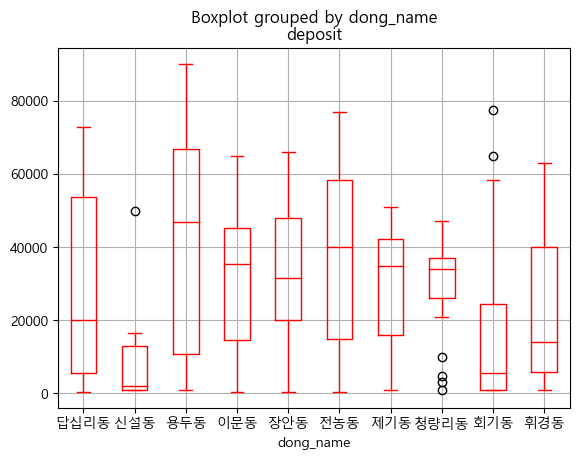

In [52]:
mid3.boxplot(column='deposit',by='dong_name',color='red')

<AxesSubplot:xlabel='dong_name', ylabel='deposit'>

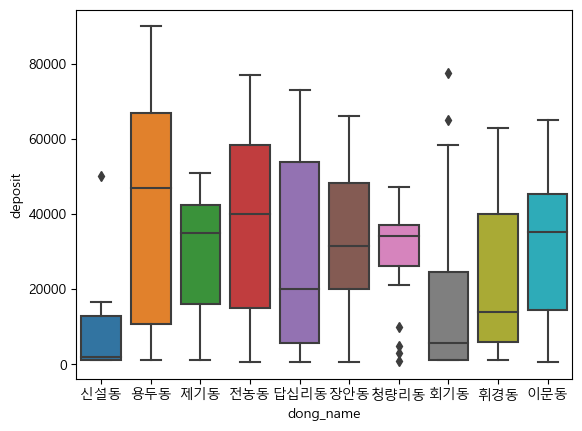

In [51]:
sns.boxplot(data=mid3, y='deposit', x='dong_name')

In [53]:
mid1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


In [54]:
mid10=pd.read_csv('c:/temp/mid1_2024041.csv')
mid10

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,11.96,117,94,4,503,94,50,13
1,8.33,107,115,11,496,131,50,11
2,8.77,114,38,13,317,128,50,16
3,10.43,77,69,0,25,24,50,18
4,11.91,133,82,0,54,84,50,17
...,...,...,...,...,...,...,...,...
231,8.67,125,62,14,477,112,80,13
232,5.36,135,110,0,112,117,80,16
233,6.41,142,30,0,472,136,80,15
234,6.23,112,38,17,316,104,80,16


In [55]:
mid10.mean()

Sales            7.060169
CompPrice      123.415254
Income          68.741525
Advertising      6.487288
Population     256.771186
Price          113.788136
Age             64.872881
Education       13.889831
dtype: float64

In [56]:
mid10

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,11.96,117,94,4,503,94,50,13
1,8.33,107,115,11,496,131,50,11
2,8.77,114,38,13,317,128,50,16
3,10.43,77,69,0,25,24,50,18
4,11.91,133,82,0,54,84,50,17
...,...,...,...,...,...,...,...,...
231,8.67,125,62,14,477,112,80,13
232,5.36,135,110,0,112,117,80,16
233,6.41,142,30,0,472,136,80,15
234,6.23,112,38,17,316,104,80,16


In [57]:
mid10[['Income','Education']].corr()

,Income,Education
Income,1.000000,-0.025661
Education,-0.025661,1.000000


In [58]:
mid1[['Income','Education']].corr()

,Income,Education
Income,1.000000,-0.056855
Education,-0.056855,1.000000


In [59]:
mid1.corr('Education','Income')

ValueError: method must be either 'pearson', 'spearman', 'kendall', or a callable, 'Education' was supplied

In [60]:
mid3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   675 non-null    int64  
 1   monoth       675 non-null    int64  
 2   deposit      675 non-null    int32  
 3   m_rent       675 non-null    int64  
 4   built_yr     675 non-null    int64  
 5   dong_name    675 non-null    object 
 6   apt_name     675 non-null    object 
 7   size         675 non-null    float64
 8   gu_code      675 non-null    int64  
 9   deposit1     675 non-null    float64
 10  deposit_new  675 non-null    float64
dtypes: float64(3), int32(1), int64(5), object(2)
memory usage: 55.5+ KB


In [61]:
0*(97/100)+1*(3/100)

0.03

In [62]:
data=[0,1]
sd_x=np.std(data)
np.sqrt(100)*sd_x

5.0

In [63]:
# E(X^2)-(E(X))^2 =var(X_1) , sqrt(var(X_1)) : 상자의 표준편차 
var_x=0*(97/100)+1*(3/100)-(1/2)**2
var_x

-0.22

In [64]:
SE_X=np.std(data)*np.sqrt(3)
print(SE_X)

0.8660254037844386


In [65]:
# 파이썬으로 정규분포 곡선 아래 면적(확률)을 계산하고자 한다. 
mean=0
se=1
from scipy.stats import norm 
# Pr(49.5<X100<50.5)
prob=norm.cdf(6,mean, se)-norm.cdf(2, mean, se)
print(prob)

0.022750130961591508
